<h1 style="color:#720026"><center>Comparing the Correlations of Sprint Results and Pitstop Times with Racers' Overall Times</center></h1>
<h2 style="color:#4f000b"><center>QTM 151-1<center></h2>
<h3 style="color:#4f000b"><center>by Rahul Ulman, Daolong Yang and Yoonsuh Park<center></h3>




In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<b style="color:#4f000b">Introduction</b>
<p style="color:#CE4257">
Formula 1 (F1) is the highest level of motorsport racing for single-driver cars. Each season consists of several races, called Grands Prix, where both the drivers and the constructors of the cars have the opportunity to win points in numerous ways, from placement to fastest laps. In recent years, some Grands Prix have adopted a qualification system called sprints, where the drivers do a shorter race of the circuit to determine their placement at the start of the real race. During the real race, drivers must make pit stops to fix issues with their cars, such as their tires being worn out. At the end of the season, the driver with the highest number of points wins the drivers' championship and the constructor with the highest number of points wins the constructors' championships.
</p>
<p style="color:#CE4257">
Our group is investigating whether the speed of drivers' sprints and the lengths of their pit stops have a noticable effect on their placements. The sprints could portend their speed in the real race, but on the other hand, sprints could be a completely different skill set and have no impact on the final placements. The pit stops are key to any F1 race, both in timing and speed. The edges gained in these pauses could be a key factor in determining the final placements of races.
</p>

<b style="color:#4f000b">Importing Data</b>
<p style="color:#CE4257">First, we need to import the data that we are analyzing.</p>
<ul style="color:#CE4257">
    <li>"drivers" contains 857 observations, each one of which is a unique F1 driver. Each column contains information about the driver such as their name, nationality, etc.</li>
    <li>"results" contains 25480 observations, each one being a unique driver's result in a specific race. To note, this table contains race identification, driver identification as well as their total milliseconds time to complete the race among other characteristics.</li>
    <li>"sprint_results" contains 120 observations, each one being a unique driver's result in a specific sprint. This contains similar features to the "results" table, but in regard to a pre-race sprint instead of a whole race.</li>
    <li>"pit_stops" contains 9634 observations, each one containing data pertaining to unique driver's pit stop in a specific race. The features include the stop number within the race, which lap it was taken on, and information about its duration</li>
</ul>

In [137]:
drivers = pd.read_csv("Formula1-DatasetFull/raw_data/drivers.csv")
results = pd.read_csv("Formula1-DatasetFull/raw_data/results.csv")
sprint_results = pd.read_csv("Formula1-DatasetFull/raw_data/sprint_results.csv")
pit_stops = pd.read_csv("Formula1-DatasetFull/raw_data/pit_stops.csv")

In [161]:
pit_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9634 entries, 0 to 9633
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        9634 non-null   int64 
 1   driverId      9634 non-null   int64 
 2   stop          9634 non-null   int64 
 3   lap           9634 non-null   int64 
 4   time          9634 non-null   object
 5   duration      9634 non-null   object
 6   milliseconds  9634 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 527.0+ KB


<b style="color:#4f000b">Merging</b>

<p style="color:#CE4257">The first step of our project is to merge all the relevant columns into one dataset for easier analysis. First, a little feature engineering needs to be done on the pit_stops table, as it's not quite in the format we need. We compress the table so that each record is a unique combination of raceId and driverId, and the avg_milliseconds column is the average amount of time that the specified driver in the specified race spent in each pit stop. Then, we add on the relevant data from the sprint_results table and the drivers table, so that we have all the information that we need going forwards.</p>

In [138]:
# Grouping by 'raceId' and 'driverId' to calculate the average milliseconds
avg_pit = pit_stops.groupby(['raceId', 'driverId'])['milliseconds'].mean().reset_index()

# Renaming the 'milliseconds' column to 'avg_milliseconds'
avg_pit.rename(columns={'milliseconds': 'avg_pitstop_ms'}, inplace=True)

avg_pit['positionOrder'] = avg_pit.groupby('raceId')['avg_pitstop_ms'].rank(method='min')

# add pit stop data to main set
avg_pit.set_index(['raceId', 'driverId'], inplace=True)

data = results.join(avg_pit['positionOrder'], on=['raceId', 'driverId'], how='left', rsuffix="_pit")

sprint_results.set_index(['raceId', 'driverId'], inplace=True)

data = data.join(sprint_results['positionOrder'] , on=['raceId', 'driverId'], rsuffix='_sprint')

data = data.join(drivers['surname'], on='driverId')

<p style="color:#CE4257">Here's what our dataset looks like now:</p>

In [141]:
data

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,positionOrder_pit,positionOrder_sprint,surname
0,1,18,1,1,22,1,1,1,1,10.0,...,1:34:50.616,5690616,39,2,1:27.452,218.300,1,NaN,NaN,Heidfeld
1,2,18,2,2,3,5,2,2,2,8.0,...,+5.478,5696094,41,3,1:27.739,217.586,1,NaN,NaN,Rosberg
2,3,18,3,3,7,7,3,3,3,6.0,...,+8.163,5698779,41,5,1:28.090,216.719,1,NaN,NaN,Alonso
3,4,18,4,4,5,11,4,4,4,5.0,...,+17.181,5707797,58,7,1:28.603,215.464,1,NaN,NaN,Kovalainen
4,5,18,5,1,23,3,5,5,5,4.0,...,+18.014,5708630,43,1,1:27.418,218.385,1,NaN,NaN,Nakajima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,...,\N,\N,39,12,1:29.833,211.632,11,17.0,NaN,de Vries
25836,25842,1096,825,210,20,16,17,17,17,0.0,...,\N,\N,40,20,1:31.158,208.556,11,13.0,NaN,Kvyat
25837,25843,1096,1,131,44,5,18,18,18,0.0,...,\N,\N,42,11,1:29.788,211.738,9,1.0,NaN,Heidfeld
25838,25844,1096,849,3,6,20,19,19,19,0.0,...,\N,\N,45,14,1:30.309,210.517,130,19.0,NaN,Aitken


<b style="color:#4f000b">Data Cleaning</b>

<p style="color:#CE4257">First we need to remove all the records that contain any NA's. Since we merged tables that cover different time spans, we need to ensure that we only analyze the timeframe where they overlap. Also, some of the nonexistent data is writen as "\N", so those need to be converted into NA's before we drop every nonexistent record. Then, we need to make sure that all the relevant data is in the correct type so that we can analyze it properly.</p>

In [142]:
data.replace(r'\N', pd.NA, inplace=True)
data = data.dropna()

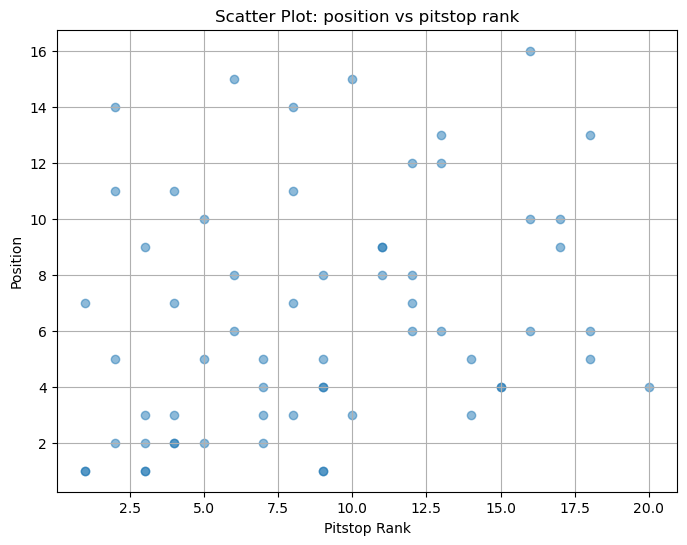

In [144]:
# Scatter plot for 'avg_pitstop_ms' and 'milliseconds'
plt.figure(figsize=(8, 6))
plt.scatter(y = data['positionOrder'], x = data['positionOrder_pit'], alpha=0.5)
plt.xlabel('Pitstop Rank')
plt.ylabel('Position')
plt.title('Scatter Plot: position vs pitstop rank')
plt.grid(True)
plt.show()

<p style="color:#CE4257">There seems to be a very slight correlation between a driver's pitstop speed and their final position. This would make sense, as F1 has such narrow margins of victory that we would expect pitstop speed to be a valuable edge between drivers.</p>

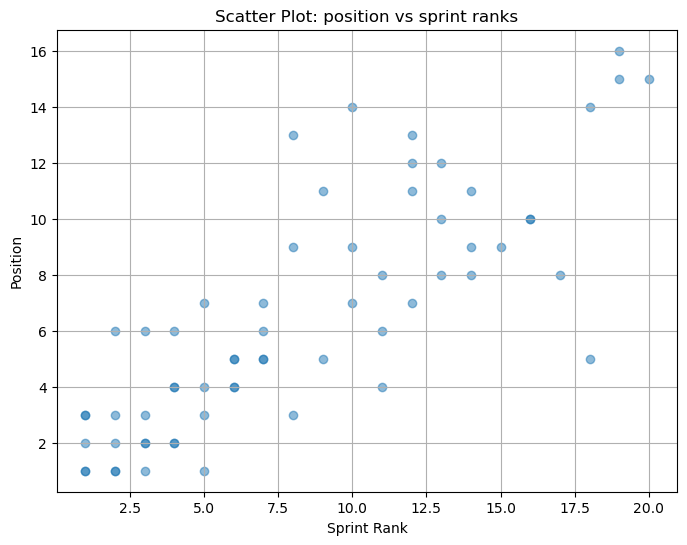

In [145]:
# Scatter plot for 'avg_pitstop_ms' and 'milliseconds'
plt.figure(figsize=(8, 6))
plt.scatter(y = data['positionOrder'], x = data['positionOrder_sprint'], alpha=0.5)
plt.xlabel('Sprint Rank')
plt.ylabel('Position')
plt.title('Scatter Plot: position vs sprint ranks')
plt.grid(True)
plt.show()

<p style="color:#CE4257">We can see that there is a clear trend between the sprint rank of a driver and their final placement. This is somewhat predictable, as the faster a driver completes their sprint, the fastwe we would expect them to complete the whole race.</p>

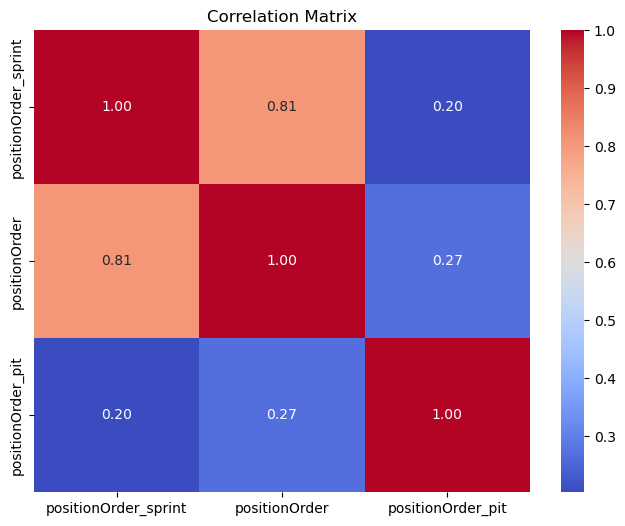

In [146]:
correlation_matrix = data[['positionOrder_sprint', 'positionOrder', 'positionOrder_pit']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<p style="color:#CE4257">This heatmap illustrates the conclusions we drew from the first two scatterplots. The results of a sprint are very predictive of where a driver will finish, but the pitstop speed only shows a slight correlation.</p>

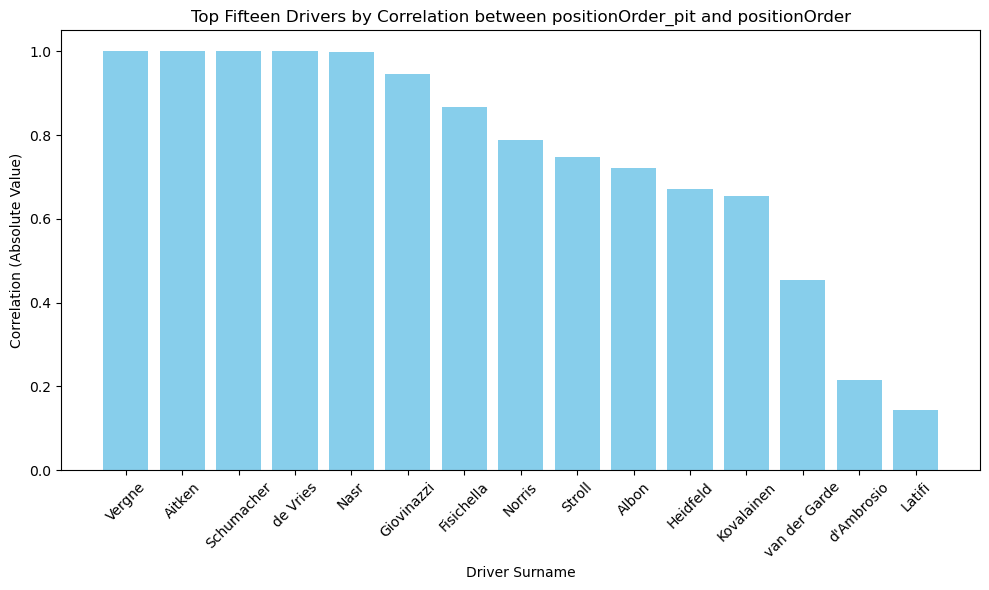

In [154]:
# Calculate correlation for each driver (group by 'driverId')
driver_correlation = data.groupby('driverId')[['positionOrder', 'positionOrder_pit']].corr().iloc[0::2, -1].reset_index()
driver_correlation.rename(columns={'positionOrder_pit': 'correlation'}, inplace=True)

# Get the absolute values of correlations
driver_correlation['correlation'] = driver_correlation['correlation'].abs()

# Sort drivers by correlation and select the top ten drivers
top_drivers = driver_correlation.sort_values('correlation', ascending=False).head(15)

# Merge with 'drivers' DataFrame to get driver names
top_drivers_with_names = pd.merge(top_drivers, data, on='driverId', how='left')

# Plotting the top ten drivers by correlation
plt.figure(figsize=(10, 6))
plt.bar(top_drivers_with_names['surname'], top_drivers_with_names['correlation'], color='skyblue')
plt.xlabel('Driver Surname')
plt.ylabel('Correlation (Absolute Value)')
plt.title('Top Fifteen Drivers by Correlation between positionOrder_pit and positionOrder')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<p style="color:#CE4257">We were also interested in seeing whether there were certain drivers whose positions could be predicted from their pitstop times better than others. As we can see in the bargraph, the top few drivers were extremly predictable from their pit times, while there was a precipitous dropoff after the top twelve in predictability.</p>

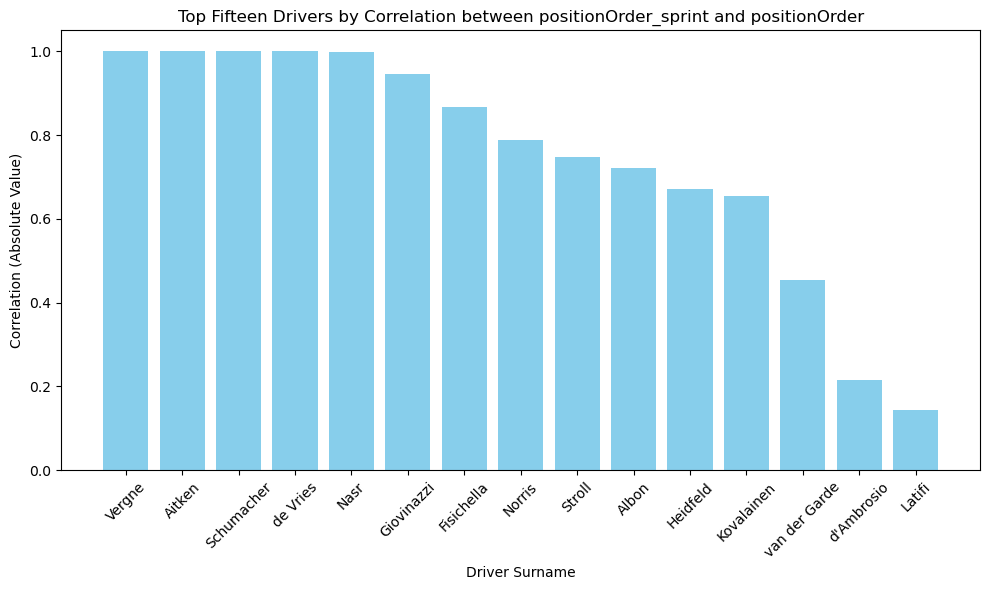

In [155]:
# Calculate correlation for each driver (group by 'driverId')
driver_correlation = data.groupby('driverId')[['positionOrder', 'positionOrder_sprint']].corr().iloc[0::2, -1].reset_index()
driver_correlation.rename(columns={'positionOrder_sprint': 'correlation'}, inplace=True)

# Get the absolute values of correlations
driver_correlation['correlation'] = driver_correlation['correlation'].abs()

# Sort drivers by correlation and select the top ten drivers
top_drivers = driver_correlation.sort_values('correlation', ascending=False).head(15)

# Merge with 'drivers' DataFrame to get driver names
top_ten_drivers_with_names = pd.merge(top_drivers, drivers, on='driverId', how='left')

# Plotting the top ten drivers by correlation
plt.figure(figsize=(10, 6))
plt.bar(top_drivers_with_names['surname'], top_drivers_with_names['correlation'], color='skyblue')
plt.xlabel('Driver Surname')
plt.ylabel('Correlation (Absolute Value)')
plt.title('Top Fifteen Drivers by Correlation between positionOrder_sprint and positionOrder')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<p style="color:#CE4257">This bargraph shows the top fifteen drivers by how well their sprint placements predicted their final placements. We can see that certain drivers, like Aitken, Leclerc, de Vries, Vergne and Schumacher were extremely predictable based on their sprints, while racers like Merhi, Stroll and Fisichella are much harder to predict by the same metric.</p>

<b style="color:#4f000b">Discussion</b>
<p style="color:#CE4257">Through the analysis of Formula 1 race data, several key observations surfaced. Primarily, there exists a subtle yet noticeable correlation between a driver's pitstop efficiency and their final race position. This correlation suggests that in Formula 1's highly competitive landscape, pitstop performance can provide a crucial edge in determining a driver's standing. Additionally, a strong relationship emerged between a driver's sprint rank and their ultimate race placement, indicating that quicker sprint times often translate to better overall race performances. The heatmap visualization reinforced this trend by highlighting the significant predictive nature of sprint results compared to the relatively weaker correlation seen between pitstop speed and final standings. Moreover, while top-ranking drivers showed high predictability based on their pitstop times, predictability notably declined beyond the top twelve positions. Lastly, certain drivers demonstrated notably predictable outcomes based on their sprint placements, such as Aitken, Leclerc, de Vries, Vergne, and Schumacher, while others like Merhi, Stroll, and Fisichella exhibited lower predictability using the same metric. These findings collectively underscore the intricate interplay between pitstop efficiency, sprint performance, and their varying degrees of influence on drivers' final race standings in Formula 1.</p>